<a href="https://colab.research.google.com/github/Beingruman28/Data_Science/blob/main/DS201_Mid_Course_Summative_Assignment_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploring Data Science Job Opportunities 🔍🚀**

Your mission is to design a specialized tool that extracts and analyzes data science job listings from a single online source of your choice. Focus on crafting a laser-focused web scraping solution tailored to the chosen platform, ensuring the collection of crucial details such as job titles, company names, experience requirements, salary ranges, and locations.

### **Key Tasks:**

1. **Source Selection:**
Choose a preferred online platform for data science job listings. Platforms like TimesJobs, LinkedIn Jobs, Indeed, Naukri, Glassdoor are potential options. Specify your chosen source in your solution. 🎯
2. **Web Scraping Precision:**
Engineer a targeted web scraping mechanism adept at extracting specific information from the chosen platform. ⚙️
3. **Data Extraction:**
Focus on extracting essential details from job listings, including but not limited to job titles, company names, required experience levels, salary ranges, and locations. 📊
4. **Data Organization:**
Ensure efficient organization and cleaning of the extracted data. The emphasis should be on presenting the information in a clear and understandable format.🧹
5. **Insights Generation:**
Develop tools for analyzing the gathered data to generate insights. Explore patterns related to job titles, experience requirements, salary distributions, and geographic preferences. 🔍
6. **Visualization:**
Create visual representations such as charts and graphs to communicate the insights effectively. Your visuals should provide a user-friendly interpretation of the data. 📈

#Importing necessary libraries and selenium drivers for data extraction:

In [1]:
!pip install selenium
!pip install parsel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.6/461.6 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00


In [2]:
import selenium
import pandas as pd
import numpy as np
import os
from parsel import Selector
from time import sleep
from selenium import webdriver
from selenium.webdriver.chromium import service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
import time

In [3]:
!apt-get update
!apt-get install chromium chromium-driver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.6 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,614 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-securit

In [4]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

#Inserting our desired filtered url, Here we are using linkedin filters as following:
## 1. Posted from Past Week
## 2. Employement type  - Full Time
## 3. Experience Level  - Entry Level, Associate
## 4. Jobs in 'Data Science'
## 5. Location - Banglore,Mumbai,Hyderabad,Chennai.

In [48]:
url = "https://www.linkedin.com/jobs/search?keywords=Data%20Science&location=India&locationId=&geoId=102713980&f_TPR=r604800&f_PP=105214831%2C105556991%2C103671728&f_E=2%2C3&position=1&pageNum=0"

# We need to run this below command for more than 2 times as linkedin sometimes direct us to login page

In [49]:
driver = web_driver()
driver.get(url)
driver.implicitly_wait(10)

In [50]:
n =  driver.find_elements(By.CLASS_NAME, 'results-context-header')[0].text

In [51]:
import re
def job_stats(n):
    try :
        parts = re.split(r'\+', n)
        number_of_jobs = int(parts[0].replace(",", ""))
    except:
        parts = re.split(r'\ ', n)
        number_of_jobs = int(parts[0])

    return number_of_jobs

In [52]:
number_of_jobs = job_stats(n)

#Getting the total number of jobs:

In [53]:
print('Total number of jobs in market for Data Science in desired location from past week are ', number_of_jobs)

Total number of jobs in market for Data Science in desired location from past week are  658


In [54]:
i = 12
while i<= number_of_jobs/12:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    i =i + 12
    try:
        x = driver.find_element(By.XPATH, '//button[@aria-label="See more jobs"]').click()
        y = driver.find_element(By.XPATH, "/html/body/div[4]/button").click()
        z= driver.find_element(By.XPATH, "/html/body/div[3]/button").click()
        w = driver.find_element(By.XPATH,"/html/body/div[3]/button").click()
        time.sleep(2)

    except:
        pass
        time.sleep(2)

In [55]:
company_name = []
job_title = []
location = []

In [56]:
for j in range(number_of_jobs):
    try:
        company = driver.find_elements(By.CLASS_NAME, 'base-search-card__subtitle')[j].text
        company_name.append(company)
        title = driver.find_elements(By.CLASS_NAME, 'base-search-card__title')[j].text
        job_title.append(title)
        loc = driver.find_elements(By.CLASS_NAME, 'job-search-card__location')[j].text
        location.append(loc)

    except:
        pass

In [57]:
dict1 = {'company_name': company_name, 'job_title': job_title, 'location': location, 'JOB_PORTAL': 'LINKEDIN'}


#Converting into DataFrame:

In [58]:
linkedin_data =pd.DataFrame(dict1)

In [59]:
linkedin_data.head(5)

,company_name,job_title,location,JOB_PORTAL
0,Creditsafe Technology,Junior Data Analyst,"Hyderabad, Telangana, India",LINKEDIN
1,iSpatial Techno Solutions (IST),Data Scientist,"Hyderabad, Telangana, India",LINKEDIN
2,NuWare,Analyst - Data Science,"Bengaluru, Karnataka, India",LINKEDIN
3,ClearFeed,Machine Learning Intern,"Bengaluru, Karnataka, India",LINKEDIN
4,Alpha Tech,Data Scientist / Data Analyst Fresher,"Bengaluru, Karnataka, India",LINKEDIN


In [60]:
linkedin_data.shape

(25, 4)

In [61]:
import os

#Saving the DataFrame into Csv file.


In [62]:
linkedin_data.to_csv(r'C:\Users\Ruman\Desktop\web_scraping\linkedin_jobs12.csv')

In [63]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()


Saving Desktop_linkedin_jobs1.csv to Desktop_linkedin_jobs1.csv


In [64]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Desktop_linkedin_jobs1.csv')

# Display the DataFrame
df.head()


,Unnamed: 0,company_name,job_title,location,JOB_PORTAL
0,0,Creditsafe Technology,Junior Data Analyst,"Hyderabad, Telangana, India",LINKEDIN
1,1,ClearFeed,Machine Learning Intern,"Bengaluru, Karnataka, India",LINKEDIN
2,2,Wipro,Data Analyst,"Pune, Maharashtra, India",LINKEDIN
3,3,Give,Analyst,"Bengaluru, Karnataka, India",LINKEDIN
4,4,Multicloud4U® Technologies,Data Scientist,"Pune, Maharashtra, India",LINKEDIN


In [65]:
df.shape

(98, 5)

In [66]:
df

,Unnamed: 0,company_name,job_title,location,JOB_PORTAL
0,0,Creditsafe Technology,Junior Data Analyst,"Hyderabad, Telangana, India",LINKEDIN
1,1,ClearFeed,Machine Learning Intern,"Bengaluru, Karnataka, India",LINKEDIN
2,2,Wipro,Data Analyst,"Pune, Maharashtra, India",LINKEDIN
3,3,Give,Analyst,"Bengaluru, Karnataka, India",LINKEDIN
4,4,Multicloud4U® Technologies,Data Scientist,"Pune, Maharashtra, India",LINKEDIN
...,...,...,...,...,...
93,93,Novartis India,"Data Scientist, Senior Expert I (Technical)","Hyderabad, Telangana, India",LINKEDIN
94,94,Integrated Personnel Services Limited,Data Entry Operator,"Hyderabad, Telangana, India",LINKEDIN
95,95,Karyarth,UPG - AC,"Hyderabad, Telangana, India",LINKEDIN
96,96,Veritas Technologies LLC,Data Engineer,"Pune, Maharashtra, India",LINKEDIN


In [67]:
import pandas as pd
import re

# Assuming your DataFrame is named 'df' and the column is 'job_title'
# If your column is named differently, replace it with your actual column name

# Remove duplicates
df_cleaned = df.drop_duplicates(subset='job_title')

# Define a function to clean and standardize job titles
def clean_job_title(title):
    # Convert to lowercase for consistency
    title = title.lower()

    # Remove unwanted characters
    title = re.sub(r'[^a-zA-Z\s]', '', title)

    # Add more cleaning steps as needed

    return title

# Apply the cleaning function to the 'job_title' column
df_cleaned['cleaned_job_title'] = df_cleaned['job_title'].apply(clean_job_title)

# Display the cleaned DataFrame
df_cleaned[['job_title', 'cleaned_job_title']]


<ipython-input-67-2ed299d9f73e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_job_title'] = df_cleaned['job_title'].apply(clean_job_title)


,job_title,cleaned_job_title
0,Junior Data Analyst,junior data analyst
1,Machine Learning Intern,machine learning intern
2,Data Analyst,data analyst
3,Analyst,analyst
4,Data Scientist,data scientist
...,...,...
90,Tier 3 Data Analyst,tier data analyst
91,BU Tech@Lilly - Generative AI - ML Engineer,bu techlilly generative ai ml engineer
93,"Data Scientist, Senior Expert I (Technical)",data scientist senior expert i technical
94,Data Entry Operator,data entry operator


In [80]:
# Example insights
job_title_counts = df['job_title'].value_counts()
location_counts = df['location'].value_counts()
company_name_counts = df['company_name'].value_counts()
# Add more insights as needed


In [69]:
job_title_counts

Data Scientist                                                                       8
Data Engineer                                                                        7
Data Analyst                                                                         4
Vacancy For Data Scientist Fresher and Experience                                    3
Data Analyst Urgent Recruitment                                                      2
                                                                                    ..
ML-Ops Engineer                                                                      1
Data Scientist - Artificial Intelligence/Machine Learning                            1
Machine Learning Intern                                                              1
Data Specialist                                                                      1
Software Engineer I - Supply Chain Planning & Kinaxis Rapid Response [T500-10059]    1
Name: job_title, Length: 73, dtype: int64

In [70]:
location_counts

Bengaluru, Karnataka, India    53
Hyderabad, Telangana, India    27
Pune, Maharashtra, India       18
Name: location, dtype: int64

In [81]:
company_name_counts

YOGITA STAFFING SOLUTION                      6
EPAM Systems                                  5
MassMutual India                              4
OptimHire                                     3
Fusion Plus Solutions Inc                     2
                                             ..
Adfolks LLC - Platform Engineering Company    1
IoT Programming                               1
ClearFeed                                     1
Apex CoVantage                                1
Bristol Myers Squibb                          1
Name: company_name, Length: 74, dtype: int64

1.Visualization of companies Distribution:

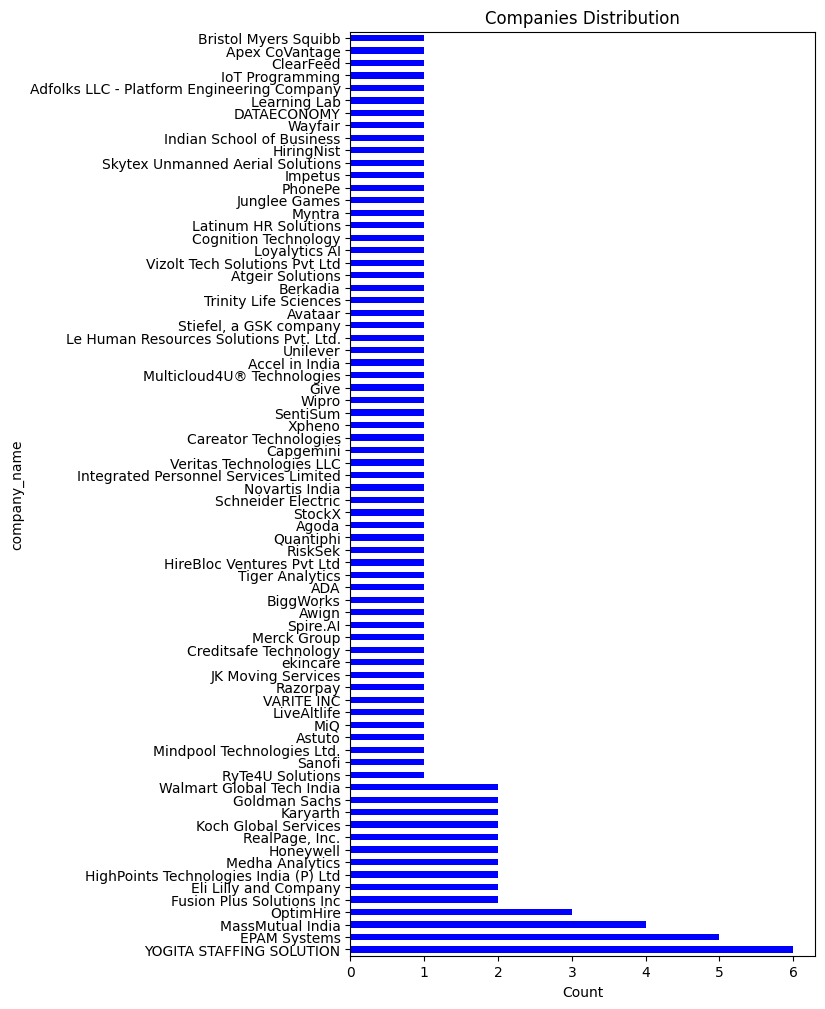

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 12))
company_name_counts.plot(kind='barh', color='blue')
plt.title('Companies Distribution')
plt.ylabel('company_name')
plt.xlabel('Count')
plt.show()


2.Visualization of Location Level distribution:

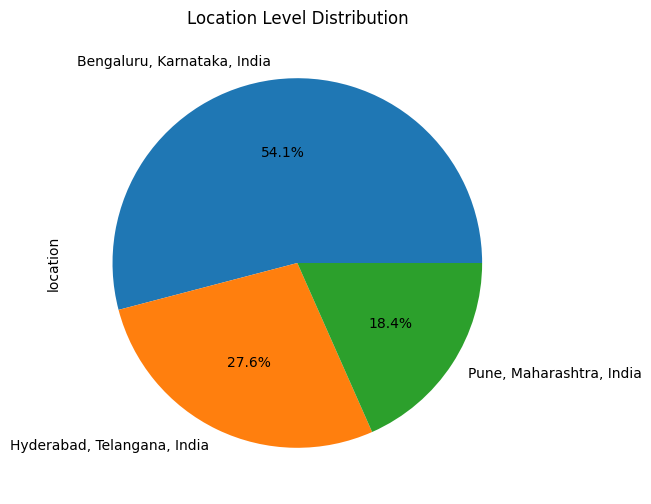

In [72]:
plt.figure(figsize=(8, 6))
location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.title('Location Level Distribution')
plt.show()


3.visualization of top 15 job_title distribution:


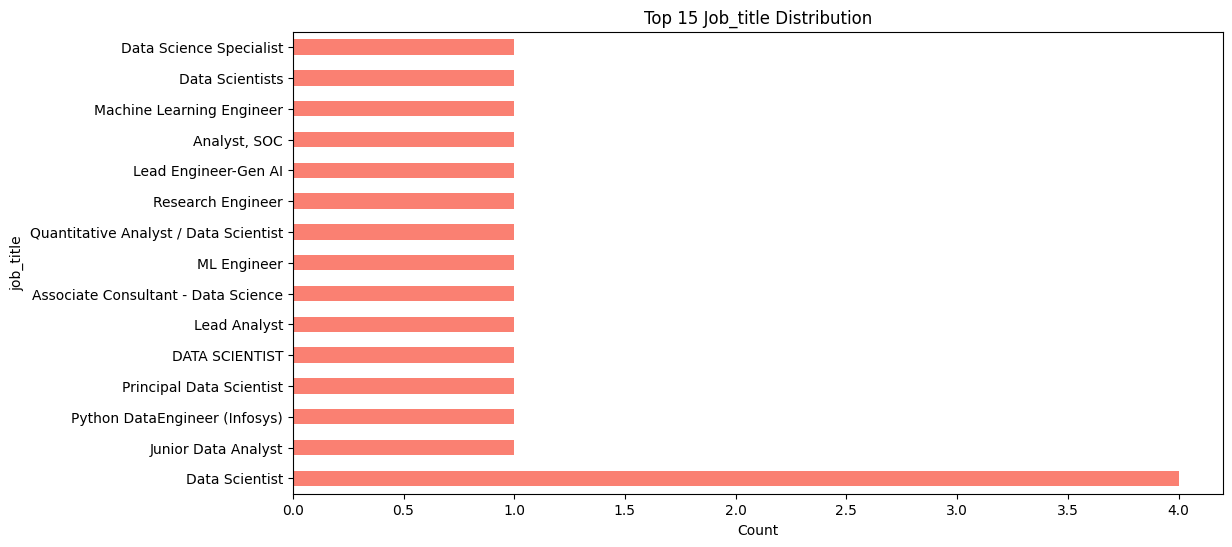

In [86]:
plt.figure(figsize=(12, 6))
linkedin_data['job_title'].value_counts().head(15).plot(kind='barh', color='salmon')
plt.title('Top 15 Job_title Distribution')
plt.xlabel('Count')
plt.ylabel('job_title')
plt.show()

4.Job Titles with "Data Scientist":

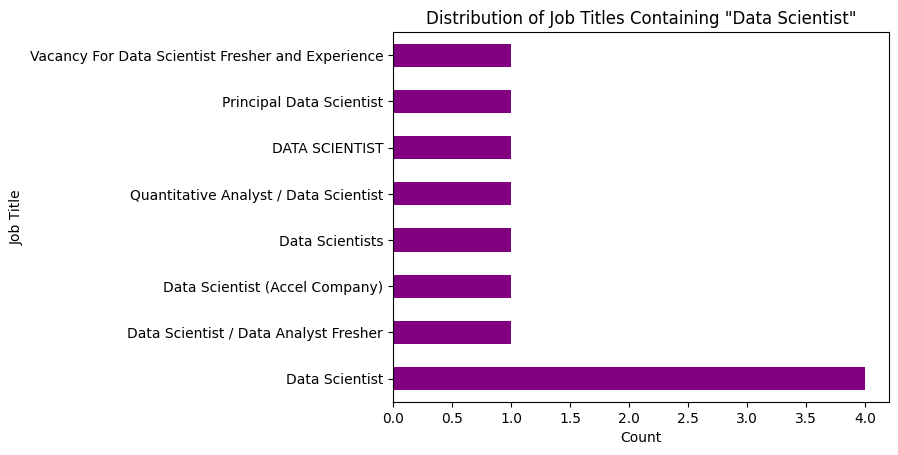

In [77]:
data_scientist_roles = linkedin_data[linkedin_data['job_title'].str.contains('Data Scientist', case=False)]
data_scientist_roles['job_title'].value_counts().plot(kind='barh', color='purple')
plt.title('Distribution of Job Titles Containing "Data Scientist"')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

This Completes the Assignment

**thankyou**


